<a href="https://colab.research.google.com/github/DannyRavi/letter_map_encryption/blob/main/mapLettersEncrypted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  این قسمت مربوط به کتابخانه‌های اصلی و متغیرهای عمومی و آدرس فایل‌های اصلی جهت خواندن فایل پیام و نوشتن پیام رمز شده هست. توجه کنید که الگوریتم اجرا شده در این کد بر اساس  رمز سزار یا شیفت دادن حروف نیست، در واقع هر حرف با حرف دیگری به صورت تصادفی و نظیر به نظیر نگاشت شده است. همینطور اعداد و مواردی غیر از ۲۶ حروف الفبای انگلیسی رمز گذاری نمی‌شود.

## input file for plaintexts are base on http://textfiles.com/stories/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from string import ascii_lowercase
from math import fmod
import random
import pandas as pd
import matplotlib.pyplot as plt
# plt.close("all")
plt.rcParams['figure.figsize'] = [12, 12]

text_url = "./text.txt"
cipher_url = "./cipher.txt"
alphabet = list(ascii_lowercase)
alphabetRandom = alphabet.copy()
# frequencies are frequency analysis in leeter of english language
# for more detail see those: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/English_letter_frequency_%28alphabetic%29.svg/340px-English_letter_frequency_%28alphabetic%29.svg.png
# https://en.wikipedia.org/wiki/Frequency_analysis
frequencies = {
    "a": 0.0817,
    "b": 0.0149,
    "c": 0.0278,
    "d": 0.0425,
    "e": 0.127,
    "f": 0.0229,
    "g": 0.0202,
    "h": 0.0609,
    "i": 0.0697,
    "j": 0.0015,
    "k": 0.0077,
    "l": 0.0403,
    "m": 0.0241,
    "n": 0.0675,
    "o": 0.0751,
    "p": 0.0193,
    "q": 0.001,
    "r": 0.0599,
    "s": 0.0633,
    "t": 0.0906,
    "u": 0.0276,
    "v": 0.0098,
    "w": 0.0236,
    "x": 0.0015,
    "y": 0.0197,
    "z": 0.0007
}

### some function for read plaintext from txt file (text.txt) and wrtie function for write ciphertext to cipher.txt

In [3]:
def read_file(file):
    with open(file) as f:
        text = ""
        for line in f.readlines():
            text += line.lower()
    return str(text)


def write_file(file, text: str):
    with open(file, "w+") as f:
        f.writelines(text.splitlines(keepends=True))



### this is heart of 3ncodeing I used to "randon.shuffle" to manipulate alphabet list. this is absoulote randomly for any execution.
### this block return a dataframe aka "df" that contain  plaintext_letter and map of letter than known by map_letter in header of dataframe.

In [4]:
random.shuffle(alphabetRandom)
mou_dic = {'plaintext_letter':alphabet,'map_letter':alphabetRandom}
df =  pd.DataFrame(mou_dic,columns=['plaintext_letter','map_letter'])
df


,plaintext_letter,map_letter
0,a,q
1,b,o
2,c,b
3,d,y
4,e,h
5,f,t
6,g,p
7,h,u
8,i,l
9,j,s


### print 1000 letters from input text. this is plaintext

In [12]:
plainText1 = read_file(text_url)
print('%.1000s' % plainText1)

this is a novel which is being marketed electronically using a
concept similar to shareware. that is, if you like this novel, you
can send $5.00, along with your name and address to:

new history books
c/o farber
190 union street
poughkeepsie, ny 12601

by registering in this way, you will be informed of any publication
news concerning breaks and the sequel, now in the works, breaks2.
you will also receive a four-issue subscription to new history, the
journal of culture in ferment.

if you would prefer reading this in the pre-electronic format, send
$17.00 for a nicely typeset copy, 8.5x11, spiral bound, with
laminated, full color covers, signed and numbered limited edition.

some word processors insert a justification code at the top of a
text file. if the format looks screwy on your screen, you may need
to delete that code. unfortunately, there is no way preserve some
of the italics and other formatting which is a part of the novel. 

enjoy!
breaks: the adventures of richard nixon i

### This block can read the input file (plaintext) and show the number of letters and the percentage of text length to the number of letters as output in the table below as output. they are kind of frequencies analysis.

In [13]:
plainText = read_file(text_url)
freq_encrypt = []
freq_sign    = []
storeAfter   = []
for letter in plainText:
    if not letter in storeAfter:
        storeAfter.append(letter)
        if letter in alphabet:
            freq_sign.append(letter)
            freq_encrypt.append(plainText.count(letter)/len(plainText))
freqPrecent = {'letter_plaintext':freq_sign,'precentage_plainText':freq_encrypt}
df_plainText = pd.DataFrame(freqPrecent,columns=['letter_plaintext','precentage_plainText'])
df_plainText = df_plainText.sort_values('letter_plaintext')
df_plainText


,letter_plaintext,precentage_plainText
4,a,0.058895
12,b,0.010841
11,c,0.019385
17,d,0.032569
8,e,0.087919
21,f,0.015324
13,g,0.016747
1,h,0.043409
2,i,0.052404
23,j,0.001262


### This block can read the input file and encrypt the input text with the help of the non-shift displacement hash function and save the result in file 3. Also show part of the encrypted message.

In [10]:
encrypted_text = read_file(text_url)
print("max letters in input file ==> ",len(encrypted_text))
replace_store = []
for letter in encrypted_text:
    if not letter in replace_store:
        replace_store.append(letter)
        if letter in alphabet:
            find_index = alphabet.index(letter)
            plaintext = str(alphabet[find_index])
            myKey =  str(alphabetRandom[find_index].upper())
            encrypted_text = encrypted_text.replace(plaintext,myKey)
print('%.1000s' % encrypted_text)
write_file(cipher_url, encrypted_text)

max letters in input file ==>  148978
AULD LD Q NIVHF WULBU LD OHLNP ZQEXHAHY HFHBAEINLBQFFK CDLNP Q
BINBHRA DLZLFQE AI DUQEHWQEH. AUQA LD, LT KIC FLXH AULD NIVHF, KIC
BQN DHNY $5.00, QFINP WLAU KICE NQZH QNY QYYEHDD AI:

NHW ULDAIEK OIIXD
B/I TQEOHE
190 CNLIN DAEHHA
RICPUXHHRDLH, NK 12601

OK EHPLDAHELNP LN AULD WQK, KIC WLFF OH LNTIEZHY IT QNK RCOFLBQALIN
NHWD BINBHENLNP OEHQXD QNY AUH DHJCHF, NIW LN AUH WIEXD, OEHQXD2.
KIC WLFF QFDI EHBHLVH Q TICE-LDDCH DCODBELRALIN AI NHW ULDAIEK, AUH
SICENQF IT BCFACEH LN THEZHNA.

LT KIC WICFY REHTHE EHQYLNP AULD LN AUH REH-HFHBAEINLB TIEZQA, DHNY
$17.00 TIE Q NLBHFK AKRHDHA BIRK, 8.5M11, DRLEQF OICNY, WLAU
FQZLNQAHY, TCFF BIFIE BIVHED, DLPNHY QNY NCZOHEHY FLZLAHY HYLALIN.

DIZH WIEY REIBHDDIED LNDHEA Q SCDALTLBQALIN BIYH QA AUH AIR IT Q
AHMA TLFH. LT AUH TIEZQA FIIXD DBEHWK IN KICE DBEHHN, KIC ZQK NHHY
AI YHFHAH AUQA BIYH. CNTIEACNQAHFK, AUHEH LD NI WQK REHDHEVH DIZH
IT AUH LAQFLBD QNY IAUHE TIEZQAALNP WULBU LD Q RQEA IT AUH NIVHF. 

HNSIK!
OEH

## This block can read the encrypted message and show the result of frequency analysis of the letters in its text as output.

In [7]:
freq_encrypt = []
freq_sign    = []
storeAfter   = []
for letter in encrypted_text:
    if not letter in storeAfter:
        storeAfter.append(letter)
        letter = letter.lower()
        if letter in alphabetRandom:
            freq_sign.append(letter)
            freq_encrypt.append(encrypted_text.count(letter.upper())/len(encrypted_text))
freqPrecent = {'letter_in_cipher':freq_sign,'precentage_letter_cipher':freq_encrypt}
df_encrypted =  pd.DataFrame(freqPrecent,columns=['letter_in_cipher','precentage_letter_cipher'])
df_encrypted = df_encrypted.sort_values('letter_in_cipher')
df_encrypted 

,letter_in_cipher,precentage_letter_cipher
0,a,0.064983
11,b,0.019385
19,c,0.022366
3,d,0.044846
15,e,0.040321
9,f,0.030723
25,g,0.000544
8,h,0.087919
6,i,0.055176
22,j,0.000470


### This block shows the frequency analysis diagram of letters in 3 modes of encrypted message and incoming message and frequency analysis of texts in English.

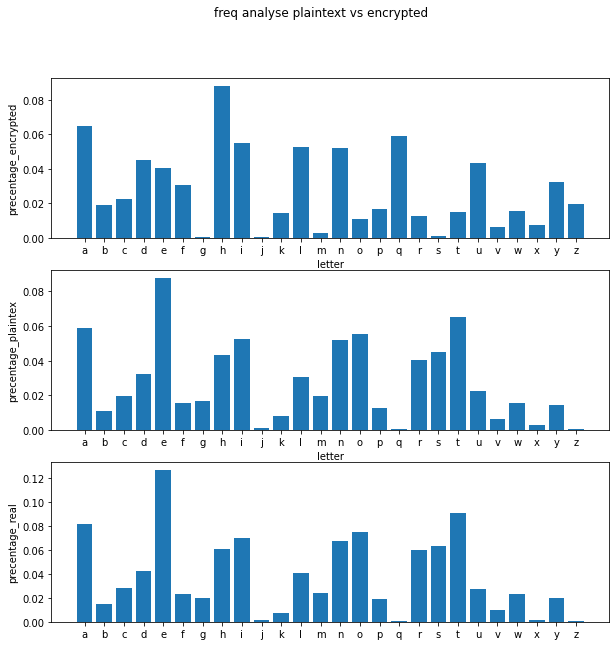

In [8]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('freq analyse plaintext vs encrypted')

ax1.bar(df_encrypted['letter_in_cipher'],df_encrypted['precentage_letter_cipher'])
ax1.set_xlabel('letter')
ax1.set_ylabel('precentage_encrypted')

ax2.bar(df_plainText['letter_plaintext'],df_plainText['precentage_plainText'])
ax2.set_xlabel('letter')
ax2.set_ylabel('precentage_plaintex')

ax3.bar(frequencies.keys(),frequencies.values())
ax3.set_ylabel('precentage_real')


plt.show()


## Finally, in this block, by analyzing the frequency analysis of the letters in the input text and the encrypted text, we can decode the mapping of the letters from the original text to the encrypted text.

In [9]:
dfLast = pd.concat([df_plainText,df_encrypted],axis=1)
dfLast
# dfLast[['letter_plaintext','letter_in_cipher']]

,letter_plaintext,precentage_plainText,letter_in_cipher,precentage_letter_cipher
0,t,0.064983,a,0.064983
1,h,0.043409,u,0.043409
2,i,0.052404,l,0.052404
3,s,0.044846,d,0.044846
4,a,0.058895,q,0.058895
5,n,0.051739,n,0.051739
6,o,0.055176,i,0.055176
7,v,0.006296,v,0.006296
8,e,0.087919,h,0.087919
9,l,0.030723,f,0.030723
